In [3]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
import random
from random import shuffle 

class Event:
    def __init__(self, time, action, bm, passenger):
        self.time = time
        self.action = action
        self.bm = bm
        self.p = passenger
    def __lt__(self, other):
        return (self.time, self.bm, self.p) < (other.time, other.bm, other.p)
    def __le__(self, other):
        return (self.time, self.bm, self.p) <= (other.time,  other.bm, other.p)

class Passagier:
    def __init__(self, Ziel):
        self.ziel = Ziel
        self.umstieg = 8 #'dummy_place'
        self.time = 0
        self.bm = 'dummy'
    def __lt__(self, other):
        return (self.time, self.bm, self.ziel, self.umstieg) < (other.time, other.bm, other.ziel, other.umstieg)
    def __le__(self, other):
        return (self.time, self.bm, self.ziel, self.umstieg) <= (other.time, other.bm, other.ziel, other.umstieg)
    
        
def shuffle0(passengers):
    for i in range(len(passengers)):
        x = [j for j in range(len(passengers[i]))]
        shuffle(x)
        passengers[i] = [passengers[i][k] for k in x]

def calc_pic(grah, ListeColor, ListeSize):
    nx.draw(graph, nx.get_node_attributes(graph,'pos'), with_labels = True, node_color = ListeColor, node_size = ListeSize)

def cap(menge):
    temp = []
    if len(menge) == 0 or len(menge)== 1:
        return menge
    elif len(menge) == 2:
        for i in menge[0]:
            if i in menge[1]:
                temp += [i]
    else:
        return print('Ein Fehler')
    return [temp]
#default='#ecf2e3'
default='#cad3b8' #nice color

In [4]:
# Lösung für Passagier als Klasse
def solve(eventq, passengers, bms, graph):
    imglist = []
    TIME = []
    v = [len([idx for idx, passenger in enumerate(passengers[n]) if passenger.ziel == n]) == 0 for n in range(len(passengers))]
    if not (v == [True]*len(passengers)):
        ErrorMessage = 'Bei Passengers/Netz sind an den Knoten {} Passagiere, die auf derselben Ziel untergebracht sind.'.format([idx for idx, boolean in enumerate(v) if boolean == False])
        raise Exception(ErrorMessage)
    
    if not (len(graph.node)) == (len(passengers)):
        ErrorMessage = 'Die Graphiken werden fehlerhaft berechnet.\n'
        if len(graph.node) < len(passengers):
            ErrorMessage += 'Es sind mehr Einträge in Passengers ({}) als Knoten im Graph ({})'.format(len(passengers),len(graph.node)) + '\n'
            ErrorMessage += 'Löschen/Fügen Sie ({}) Einträge/Knoten im Passengers/Graph /ein'.format(abs(len(passengers) - len(graph.node)))
        else:
            ErrorMessage += 'Es sind weniger Einträge in Passengers ({}) als Knoten im Graph ({})'.format(len(passengers),len(graph.node)) + '\n'
            ErrorMessage += 'Fügen/Löschen Sie ({}) Einträge/Knoten im Passengers/Graph /ein'.format(abs(len(passengers) - len(graph.node)))
        raise Exception(ErrorMessage)
    
    if not [len(bms[i]['itinerary']) == len(bms[i]['travel_times']) for i in range(len(bms))] == [True]*len(bms):
        raise Exception('In der Liste BMS sind itinerary und travel_times nicht gleich groß.')
    ####
    # Visualisierung
    ListeNodes = list(graph.node)
    ListeColor = [default]*len(ListeNodes)
    ####
    zykel = 0
    while True:
        print('\n Durchläuft die While-Schleife zum {}. Mal'.format(zykel))
       
        ''' # Ausgabe der Queue mit Checks
        m='Länge der Queue: {} Queue: ['.format(len(eventq))
        for el in eventq:
            p = el.p
            m += '[Time: {}.{}, Aktion: {}, BMName:{}.{}]; '.format(el.time, el.time==p.time, el.action, el.bm, el.bm==p.bm)
        print(m+']')
        #'''
        
        # Abbruchbedingung
        print([len(bm['n_passengers']) for bm in bms])
        print([len(node) for node in passengers])
        if (([len(node) == 0 for node in passengers] == [True]*len(passengers)) and 
           ([len(bm['n_passengers']) == 0 for bm in bms] == [True]*len(bms))):
            print('Ende')
            BMstat = [{'Name': bm['name'],'Stopps': bm['stop'], 'Länge der insgesamt zurückgelegten Strecke': len(bm['itinerary'])} for bm in bms]
            return imglist, BMstat, TIME
        
        event = hq.heappop(eventq)
        
        Bahnen = [idx for idx, bahn in enumerate(bms) if bahn['name'] == event.bm]
        if not Bahnen:
            raise Exception('Fehler')
        if len(Bahnen)>1:
            raise Exception('Fehler')
        bm = bms[Bahnen[0]]

        if bm['name'] != 'dummy':
            itinerary_len = len(bm['itinerary'])
            current_node = bm['itinerary'][bm['stop'] % itinerary_len]
            cn_number = [idx for idx, station in enumerate(bm['itinerary']) if station == current_node][0] #Current Node Number
        
            next_node = bm['itinerary'][(bm['stop']+1) % itinerary_len]
            nn_number = [idx for idx, station in enumerate(bm['itinerary']) if station == next_node][0]
            print('Fahrzeug {} ist am Knoten {}, der nächste Halt {}, die aktuelle Zeit: {}'.format(bm['name'],ListeNodes[current_node], ListeNodes[next_node], event.time))
            print('und {} Stopp zum {}. Mal, Runden: {}, Rest: {}'.format(bm['name'],bm['stop'],int(bm['stop']/itinerary_len),bm['stop']%itinerary_len))
            stop = bm['stop']
        
            ####
            # Visualisierung
            ListeSize = [len(i)*10 for i in passengers]
            ListeColor[current_node] = bm['color']
            #calc_pic(graph, ListeColor, ListeSize)
            #plt.savefig("img/file%05d.svg" % event.time)
            #imglist += ["img/file%05d.svg" % event.time]
            print("Graph gespeichert als file%05d.svg, wird in imglist hinzugefügt" % event.time)
            plt.show()
            ListeColor[current_node] = default
            ####
        
        if event.action == 'load':
            print('Fahrzeug {} load'.format(bm['name']))
            print('Fahrzeug {} hat {} Plätze frei'.format(bm['name'],bm['capacity']-len(bm['n_passengers'])))
            dummy = event.p
            umstieg = []
            print('Es warten {} am Knoten {}.'.format(len(passengers[current_node]), ListeNodes[current_node]))
            # Konventionelles Auffüllen
            while len(bm['n_passengers']) < bm['capacity']:
                if not current_node < len(passengers):
                    raise Exception('Die Länge von passengers {} ist <= current_node {}'.format(len(passengers),current_node))
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger.ziel in bm['itinerary']]
                if not waiting:
                    break
                passenger = passengers[current_node].pop(waiting[0])
                passenger.bm = bm['name']
                
                exit_node = passenger.ziel
                en_number = [idx for idx, station in enumerate(bm['itinerary']) if station == exit_node][0]
                
                ListExit = []    
                for i in range((en_number-cn_number)% itinerary_len):
                    ListExit += [ bm['travel_times'][(cn_number + i) % itinerary_len] ]
                ExitTime = event.time - 2
                for i in ListExit:
                    ExitTime += (i)
                print('ExitTime: {}, ListExit: {}'.format(ExitTime,ListExit))
                
                passenger.time = ExitTime
                hq.heappush(bm['n_passengers'], ExitTime)
                bm['n_passengers'].sort()
                event_neu = Event(ExitTime,'exit', bm['name'], passenger)
                if not event_neu.time == passenger.time:
                    raise Exception('Fehler beim Setzen der Event Time')
                if not event_neu.bm == passenger.bm:
                    raise Exception('Fehler beim Setzen des Namens des Beförderungsmittels')
                hq.heappush(eventq, event_neu)
            print('Berechne, wer zukünftig umsteigen soll')
            while len(bm['n_passengers']) < bm['capacity']:
                if not current_node < len(passengers):
                    raise Exception('Die Länge von passengers {} ist <= current_node {}'.format(len(passengers),current_node))
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger.ziel in bm['itinerary']]
                umstieg = passengers[current_node][:]
                waiting2 = waiting[:]
                counter = 0
                while len(waiting2) != 0:
                    temp = waiting2.pop(0) - counter
                    umstieg.pop(temp)
                    counter += 1
                umstieg = [idx for idx, passenger in enumerate(umstieg) if passenger in passengers[current_node] and passenger.umstieg != current_node]
                
                if not passengers[current_node]:
                    break
                if not umstieg:
                    break
                
                p = passengers[current_node][umstieg[0]]
                protect = [bm['name'] for bm in bms if p.ziel in bm['itinerary'] and current_node in bm['itinerary']]
                temp = []
                
                for um in umstieghilfe:
                    print(um)
                    if current_node in um:
                        temp += [um]
                for um in umstieghilfe:
                    if p.ziel in um:
                        temp += [um]
                print('Protect: ',protect)
                print('p.ziel {}, current_node {}'.format(p.ziel, current_node))
                print('Temp: ', temp)
                # Anfang der Schutzfunktion
                if not protect:
                    path = []
                    path0 = []
                    for i in [[i for i in um if i != current_node and i != p.ziel] for um in temp]:
                        path0 += i
                    path1 = [current_node]
                    if len(temp) ==2:
                        path1 += [i for i in temp[1] if i != p.ziel]
                    path2 = []
                    for i in [ [i for i in um] for um in temp if current_node in um]:
                        path2 += i
                    print('path0', path0)
                    print('path1', path1)
                    print('path2', path2)
                    print('PATH0 ',[[bm['name'] for bm in bms if node in bm['itinerary']] for node in path0])
                    print('PATH1 ',[[bm['name'] for bm in bms if node in bm['itinerary']] for node in path1])
                    print('PATH2 ',[[bm['name'] for bm in bms if node in bm['itinerary']] for node in path2])
                    PATH0 = [[bm['name'] for bm in bms if node in bm['itinerary']] for node in path0]
                    PATH1 = [[bm['name'] for bm in bms if node in bm['itinerary']] for node in path1]
                    PATH2 = [[bm['name'] for bm in bms if node in bm['itinerary']] for node in path2]
                    #
                    # Hack gilt nur für dieses Szenario
                    print(cap(PATH0))
                    print(cap(PATH1))
                    print(cap(PATH2))
                    
                    print([len(i) != 0 for i in cap(PATH0)])
                    print([len(i) != 0 for i in cap(PATH1)])
                    print([len(i) != 0 for i in cap(PATH2)])
                    
                    if not ([len(i) != 0 for i in cap(PATH0)] == [True]):
                        if not ([len(i) != 0 for i in cap(PATH1)] == [True]):
                            #if bm['name'] in ['zubringer0', 'zubringer1', 'zubringer2']:
                            path = path2
                            #else:
                            #    break
                        else:
                            if bm['name'] in ['zykel0', 'zykel1']:
                                path = path1
                            else:
                                break
                    else:
                        path = path0
                    print('path: {}'.format(path))
                else:
                    if not bm['name'] in protect:
                        break
                # Ende der Schutzfunktion
                
                passenger = passengers[current_node].pop(umstieg.pop(0))
                if not p == passenger: raise Exception('Gedankenfehler')
                
                passenger.bm = bm['name']
                
                # Das Setzen des Umstiegs ist vermutlich vom Hack abhängig
                if len(path) == 1:
                    passenger.umstieg = path[0]
                elif len(path) == 2:
                    l = [i for i in path if current_node != i]
                    passenger.umstieg = l[0]
                else:
                    raise Exception('Gedankenfehler')
                
                exit_node = passenger.umstieg
                print('exit_node ',exit_node)
                en_number = [idx for idx, station in enumerate(bm['itinerary']) if station == exit_node][0]
                
                ListExit = []    
                for i in range((en_number-cn_number)% itinerary_len):
                    ListExit += [ bm['travel_times'][(cn_number + i) % itinerary_len] ]
                ExitTime = event.time - 1
                for i in ListExit:
                    ExitTime += (i)
                print('ExitTime: {}, ListExit: {}'.format(ExitTime,ListExit))
                
                passenger.time = ExitTime
                hq.heappush(bm['n_passengers'], ExitTime)
                bm['n_passengers'].sort()
                event_neu = Event(ExitTime,'exit', bm['name'], passenger)
                if not event_neu.time == passenger.time:
                    raise Exception('Fehler beim Setzen der Event Time')
                if not event_neu.bm == passenger.bm:
                    raise Exception('Fehler beim Setzen des Namens des Beförderungsmittels')
                hq.heappush(eventq, event_neu)
                
            Time = event.time + bm['travel_times'][nn_number]
            dummy.time = Time
            hq.heappush(eventq, Event(Time, 'load', bm['name'], dummy))
            bm['stop'] += 1
            print('Es warten noch {} Fahrgäste an Knoten {}'.format(len(passengers[current_node]),ListeNodes[current_node]))
        
        # Generate events for exiting passengers
        elif event.action == 'exit':
            info = [{'Zeit': True}]
            passenger = event.p
            ExitTime = hq.heappop(bm['n_passengers'])
            print('PassagierStation:{}, PassagierTime:{}, steigt aus, EventTime {}'.format(passenger.ziel, passenger.time,event.time))
            print('Ist EventTime == PassagierTime: {}'.format(passenger.time == event.time))
            if not passenger.time == event.time:
                info = [{'Zeit': False}]
                print(passenger)
                bahn = passenger.bm
                Bahnen = [idx for idx, bahn in enumerate(bms) if bahn['name'] == passenger.bm]
                if not Bahnen:
                    raise Exception('Fehler')
                if len(Bahnen)>1:
                    raise Exception('Fehler')
                bm0 = bms[Bahnen[0]]
                print('Passenger BM:{} CList: {}'.format(bahn, bm0['n_passengers']))
                print('Event BM: {} CList: {}'.format(bm['name'], bm['n_passengers']))
               
            print('Passagier am richtigen Ort: {}'.format([passenger.ziel == current_node,passenger.umstieg == current_node]))
            if not [passenger.ziel == current_node,passenger.umstieg == current_node] == [False]*2:
                info += [{'Ort': True}]
            if [passenger.ziel == current_node,passenger.umstieg == current_node] == [False]*2:
                info += [{'Ort': False}]
                print(passenger)
                bahn = passenger.bm
                print(bahn,bm['name'])
                passengers[current_node] += [passenger]
                shuffle0(passengers)
                print('Passagier mit Ziel: {} wurde falsch berechnet.'.format(passenger.ziel))
            if not passenger.umstieg == current_node:
                info += [{'Umstieg': False}]
            if passenger.umstieg == current_node:
                info += [{'Umstieg': True}]
                n = len(passengers[current_node])
                passengers[current_node] += [passenger]
                shuffle0(passengers)
                m = len(passengers[current_node])
                if not (m-n) ==1:
                    raise Exception('kann nicht')
                print('Passagier mit Ziel: {} steigt um.'.format(passenger.ziel))
                passenger.umstieg = 8
                
            print('Es sind {} Passagiere in der Bahn'.format(len(bm['n_passengers'])))
            TIME += [{'Info': info ,'EventTime': event.time, 'PassagierTime': passenger.time}]
        else:
            raise Exception('Unknown event action')
        eventq.sort()
        zykel += 1

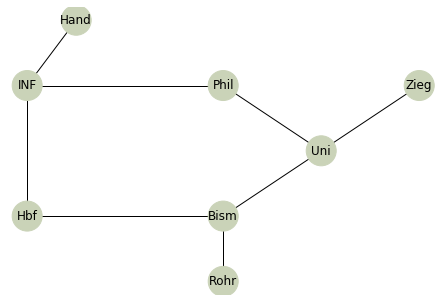

In [5]:
graph = nx.Graph()

graph.add_node('Hbf', pos=(10,10))  #0
graph.add_node('INF', pos=(10,30))  #1
graph.add_node('Phil', pos=(30,30))  #2
graph.add_node('Uni', pos=(40,20))  #3
graph.add_node('Bism', pos=(30,10))  #4
graph.add_node('Rohr', pos=(30,0))  #5
graph.add_node('Hand', pos=(15,40))  #6
graph.add_node('Zieg', pos=(50,30))  #7

ListeNodes = list(graph.node)
#Rundfahrt 
graph.add_edge(ListeNodes[0],ListeNodes[1])
graph.add_edge(ListeNodes[1],ListeNodes[0])
graph.add_edge(ListeNodes[1],ListeNodes[2])
graph.add_edge(ListeNodes[2],ListeNodes[1])
##
#graph.add_edge(ListeNodes[0],ListeNodes[2])
##
graph.add_edge(ListeNodes[2],ListeNodes[3])
graph.add_edge(ListeNodes[3],ListeNodes[2])
graph.add_edge(ListeNodes[3],ListeNodes[4])
graph.add_edge(ListeNodes[4],ListeNodes[3])
graph.add_edge(ListeNodes[4],ListeNodes[0])
graph.add_edge(ListeNodes[0],ListeNodes[4])

#Zubringer
graph.add_edge(ListeNodes[4],ListeNodes[5])
graph.add_edge(ListeNodes[5],ListeNodes[4])
graph.add_edge(ListeNodes[1],ListeNodes[6])
graph.add_edge(ListeNodes[6],ListeNodes[1])
graph.add_edge(ListeNodes[3],ListeNodes[7])
graph.add_edge(ListeNodes[7],ListeNodes[3])

ListeNodes = list(graph.node)
ListeColor = [default]*len(ListeNodes)
nx.draw(graph, nx.get_node_attributes(graph,'pos'), with_labels = True, node_color = ListeColor, node_size = 900)

In [6]:
bms = [{'color': '#f0f000', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [4, 3, 2, 1, 0], 'name': 'zykel0', 'travel_times': [10, 10, 10, 10, 10]},
    {'color': '#f000f0', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [0, 1, 2, 3, 4], 'name': 'zykel1', 'travel_times': [5, 5, 5, 5, 5]},
    {'color': '#ff0000', 'n_passengers': [], 'capacity': 20, 'stop': 0, 'itinerary': [4,5], 'name': 'zubinger0', 'travel_times': [5, 5]},
    {'color': '#00ff00', 'n_passengers': [], 'capacity': 20, 'stop': 0, 'itinerary': [1,6], 'name': 'zubinger1', 'travel_times': [5, 5]},
    {'color': '#0000ff', 'n_passengers': [], 'capacity': 20, 'stop': 0, 'itinerary': [3,7], 'name': 'zubinger2', 'travel_times': [5, 5]},
    {'n_passengers':[],'name': 'dummy', 'stop': 0,'itinerary': [], 'travel_times': []}
       ]#'''


def auf(nodes, number):
    passengers = []
    for node in range(nodes):
        passenger = []
        for ziel in range(nodes):
            if not node == ziel:
                for i in range(random.randint(1,number)):
                    passenger += [Passagier(ziel)]
        passengers += [passenger]
    return passengers
passengers = auf(8,10)

umstieghilfe = [[4,5],[1,6],[3,7]]


# shuffle passengers
shuffle0(passengers)
sums=0
for node in passengers:
    sums += len(node)
print(sums)

309


In [7]:
eventq = []
for bm in bms:
    if bm['name'] != 'dummy':
        event = Event(0, 'load', bm['name'],Passagier(_))
        event.p.bm = event.bm
        event.p.time = event.time
        hq.heappush(eventq, event)

#"""
for i in range(10):
    node = random.randint(0,len(passengers)-1)
    ziel = random.randint(0,len(passengers)-1)
    while node == ziel:
        ziel = random.randint(0,len(passengers)-1)
    event = Event(1 +i, 'exit', 'dummy', Passagier(ziel))
    event.p.bm = event.bm
    Bahnen = [idx for idx, bahn in enumerate(bms) if bahn['name'] == event.bm]
    bm = bms[Bahnen[0]]
    hq.heappush(bm['n_passengers'], event.time)
    hq.heappush(eventq, event)
#"""

A = solve(eventq, passengers, bms, graph)
print(A[1])


 Durchläuft die While-Schleife zum 0. Mal
[0, 0, 0, 0, 0, 10]
[25, 36, 41, 36, 43, 38, 53, 37]
Fahrzeug zubinger0 ist am Knoten Bism, der nächste Halt Rohr, die aktuelle Zeit: 0
und zubinger0 Stopp zum 0. Mal, Runden: 0, Rest: 0
Graph gespeichert als file00000.svg, wird in imglist hinzugefügt
Fahrzeug zubinger0 load
Fahrzeug zubinger0 hat 20 Plätze frei
Es warten 43 am Knoten Bism.
ExitTime: 3, ListExit: [5]
ExitTime: 3, ListExit: [5]
ExitTime: 3, ListExit: [5]
ExitTime: 3, ListExit: [5]
ExitTime: 3, ListExit: [5]
ExitTime: 3, ListExit: [5]
ExitTime: 3, ListExit: [5]
Berechne, wer zukünftig umsteigen soll
[4, 5]
[1, 6]
[3, 7]
Protect:  []
p.ziel 7, current_node 4
Temp:  [[4, 5], [3, 7]]
path0 [5, 3]
path1 [4, 3]
path2 [4, 5]
PATH0  [['zubinger0'], ['zykel0', 'zykel1', 'zubinger2']]
PATH1  [['zykel0', 'zykel1', 'zubinger0'], ['zykel0', 'zykel1', 'zubinger2']]
PATH2  [['zykel0', 'zykel1', 'zubinger0'], ['zubinger0']]
[[]]
[['zykel0', 'zykel1']]
[['zubinger0']]
[False]
[True]
[True]
Es w

In [8]:
A

([],
 [{'Name': 'zykel0',
   'Stopps': 17,
   'Länge der insgesamt zurückgelegten Strecke': 5},
  {'Name': 'zykel1',
   'Stopps': 33,
   'Länge der insgesamt zurückgelegten Strecke': 5},
  {'Name': 'zubinger0',
   'Stopps': 33,
   'Länge der insgesamt zurückgelegten Strecke': 2},
  {'Name': 'zubinger1',
   'Stopps': 33,
   'Länge der insgesamt zurückgelegten Strecke': 2},
  {'Name': 'zubinger2',
   'Stopps': 33,
   'Länge der insgesamt zurückgelegten Strecke': 2},
  {'Name': 'dummy',
   'Stopps': 0,
   'Länge der insgesamt zurückgelegten Strecke': 0}],
 [{'Info': [{'Zeit': False}, {'Ort': False}, {'Umstieg': False}],
   'EventTime': 1,
   'PassagierTime': 0},
  {'Info': [{'Zeit': False}, {'Ort': False}, {'Umstieg': False}],
   'EventTime': 2,
   'PassagierTime': 0},
  {'Info': [{'Zeit': False}, {'Ort': False}, {'Umstieg': False}],
   'EventTime': 3,
   'PassagierTime': 0},
  {'Info': [{'Zeit': True}, {'Ort': True}, {'Umstieg': False}],
   'EventTime': 3,
   'PassagierTime': 3},
  {'Inf

for i in {$(find . -name 'file*.svg')}; do   echo $i; inkscape -z $i -h 370 -w 550 -d 100 -e $i.png; done
cat *.png | ffmpeg -framerate 5 -f image2pipe -i - animation1.mkv